In [ ]:
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### 1. Obtener los datos

- Se usará yfinance


In [ ]:
import yfinance as yf

'''
Obtener datos: Apple, Miscrosoft, Google, Meta, Amazon, S&P 500 y Dow Jones.
'''

appl_t = yf.Ticker("AAPL")
msft_t = yf.Ticker("MSFT")
goog_t = yf.Ticker("GOOG")
fb_t = yf.Ticker("META")
amzn_t = yf.Ticker("AMZN")
sp_t = yf.Ticker("^GSPC")
dj_t = yf.Ticker("^DJI")

start_date = "2015-01-01"
end_date = "2024-03-31"
test_start_date = "2024-04-01"
test_end_date = "2024-04-30"

# entrenamiento
appl = appl_t.history(start=start_date, end=end_date)
msft = msft_t.history(start=start_date, end=end_date)
goog = goog_t.history(start=start_date, end=end_date)
fb = fb_t.history(start=start_date, end=end_date)
amzn = amzn_t.history(start=start_date, end=end_date)
sp = sp_t.history(start=start_date, end=end_date)
dj = dj_t.history(start=start_date, end=end_date)

# Prueba
appl_prueba = appl_t.history(start=test_start_date, end=test_end_date)
msft_prueba = msft_t.history(start=test_start_date, end=test_end_date)
goog_prueba = goog_t.history(start=test_start_date, end=test_end_date)
fb_prueba = fb_t.history(start=test_start_date, end=test_end_date)
amzn_prueba = amzn_t.history(start=test_start_date, end=test_end_date)
sp_prueba = sp_t.history(start=test_start_date, end=test_end_date)
dj_prueba = dj_t.history(start=test_start_date, end=test_end_date)


### 2. Procesar datos

In [ ]:
'''
Usar solo las columnas necesarias
'''

def removeColumns(df):
  for columna in df.columns:
      if columna != "Close":
          df.drop(columna, axis=1, inplace=True)

removeColumns(appl)
removeColumns(msft)
removeColumns(goog)
removeColumns(fb)
removeColumns(amzn)
removeColumns(sp)
removeColumns(dj)
removeColumns(appl_prueba)
removeColumns(msft_prueba)
removeColumns(goog_prueba)
removeColumns(fb_prueba)
removeColumns(amzn_prueba)
removeColumns(sp_prueba)
removeColumns(dj_prueba)

appl.head()

,Close
Date,
2015-01-02 00:00:00-05:00,24.435272
2015-01-05 00:00:00-05:00,23.746887
2015-01-06 00:00:00-05:00,23.749125
2015-01-07 00:00:00-05:00,24.082132
2015-01-08 00:00:00-05:00,25.007429


In [ ]:
'''
Merge data from all sources
'''
#Train
merged_data = (
    appl.merge(msft, on='Date', suffixes=('_appl', '_msft'))
    .merge(goog, on='Date', suffixes=('_msft', '_goog'))
    .merge(fb, on='Date', suffixes=('_goog', '_fb'))
    .merge(amzn, on='Date', suffixes=('_fb', '_amzn '))
    .merge(sp, on='Date', suffixes=('_amzn','_sp'))
    .merge(dj, on='Date', suffixes=('_sp','dj'))
    .rename(columns={'Close_appl': 'appl'})
    .rename(columns={'Close_msft': 'msft'})
    .rename(columns={'Close_goog': 'goog'})
    .rename(columns={'Close_fb': 'fb'})
    .rename(columns={'Close_amzn': 'amzn'})
    .rename(columns={'Close_sp': 'sp'})
    .rename(columns={'Close':'dj'})
)
merged_data.insert(0, 'Date', merged_data.index)

#Test
merged_data_test = (
    appl_prueba.merge(msft_prueba, on='Date', suffixes=('_appl', '_msft'))
    .merge(goog_prueba, on='Date', suffixes=('_msft', '_goog'))
    .merge(fb_prueba, on='Date', suffixes=('_goog', '_fb'))
    .merge(amzn_prueba, on='Date', suffixes=('_fb', '_amzn '))
    .merge(sp_prueba, on='Date', suffixes=('_amzn','_sp'))
    .merge(dj_prueba, on='Date', suffixes=('_sp','dj'))
    .rename(columns={'Close_appl': 'appl'})
    .rename(columns={'Close_msft': 'msft'})
    .rename(columns={'Close_goog': 'goog'})
    .rename(columns={'Close_fb': 'fb'})
    .rename(columns={'Close_amzn': 'amzn'})
    .rename(columns={'Close_sp': 'sp'})
    .rename(columns={'Close':'dj'})
)
merged_data_test.insert(0, 'Date', merged_data_test.index)

merged_data.head()

,Date,appl,msft,goog,fb,amzn,sp,dj
Date,,,,,,,,
2015-01-02 00:00:00-05:00,2015-01-02 00:00:00-05:00,24.435272,40.378071,26.168653,78.366852,15.4260,2058.199951,17832.990234
2015-01-05 00:00:00-05:00,2015-01-05 00:00:00-05:00,23.746887,40.006767,25.623152,77.108192,15.1095,2020.579956,17501.650391
2015-01-06 00:00:00-05:00,2015-01-06 00:00:00-05:00,23.749125,39.419563,25.029282,76.069290,14.7645,2002.609985,17371.640625
2015-01-07 00:00:00-05:00,2015-01-07 00:00:00-05:00,24.082132,39.920414,24.986401,76.069290,14.9210,2025.900024,17584.519531
2015-01-08 00:00:00-05:00,2015-01-08 00:00:00-05:00,25.007429,41.094780,25.065184,78.097137,15.0230,2062.139893,17907.869141


In [ ]:
'''
Transform date data
'''

# Convertir el objeto de fecha y hora a uno con la misma zona horaria que el índice de merged_data
start_date_tz = pd.Timestamp(start_date, tz=merged_data.index.tz)
start_date_tz2 = pd.Timestamp(test_start_date, tz=merged_data.index.tz)


# Restar las fechas
merged_data['Date'] = (merged_data.index - start_date_tz) // pd.Timedelta('1day')
merged_data.to_csv('Raw_data.csv', index=True)
merged_data_test['Date'] = (merged_data_test.index - start_date_tz2) // pd.Timedelta('1day')

merged_data.head()

,Date,appl,msft,goog,fb,amzn,sp,dj
Date,,,,,,,,
2015-01-02 00:00:00-05:00,1,24.435272,40.378071,26.168653,78.366852,15.4260,2058.199951,17832.990234
2015-01-05 00:00:00-05:00,4,23.746887,40.006767,25.623152,77.108192,15.1095,2020.579956,17501.650391
2015-01-06 00:00:00-05:00,5,23.749125,39.419563,25.029282,76.069290,14.7645,2002.609985,17371.640625
2015-01-07 00:00:00-05:00,6,24.082132,39.920414,24.986401,76.069290,14.9210,2025.900024,17584.519531
2015-01-08 00:00:00-05:00,7,25.007429,41.094780,25.065184,78.097137,15.0230,2062.139893,17907.869141


In [ ]:
'''
Normalize data: minmax normalization
'''

for columna in merged_data.columns:
  merged_data[columna] = (merged_data[columna] - merged_data[columna].min()) / (merged_data[columna].max() - merged_data[columna].min())

for columna in merged_data_test.columns:
  merged_data_test[columna] = (merged_data_test[columna] - merged_data_test[columna].min()) / (merged_data_test[columna].max() - merged_data_test[columna].min())

merged_data.to_csv('Normalized_data.csv', index=False)

merged_data.head()

,Date,appl,msft,goog,fb,amzn,sp,dj
Date,,,,,,,,
2015-01-02 00:00:00-05:00,0.000000,0.020686,0.013922,0.012347,0.010030,0.006262,0.066891,0.089982
2015-01-05 00:00:00-05:00,0.000890,0.016798,0.012981,0.008160,0.007158,0.004424,0.055908,0.076260
2015-01-06 00:00:00-05:00,0.001186,0.016811,0.011492,0.003602,0.004787,0.002421,0.050662,0.070876
2015-01-07 00:00:00-05:00,0.001483,0.018691,0.012762,0.003272,0.004787,0.003330,0.057461,0.079692
2015-01-08 00:00:00-05:00,0.001779,0.023917,0.015739,0.003877,0.009415,0.003922,0.068041,0.093083


### 2. Visualizar datos

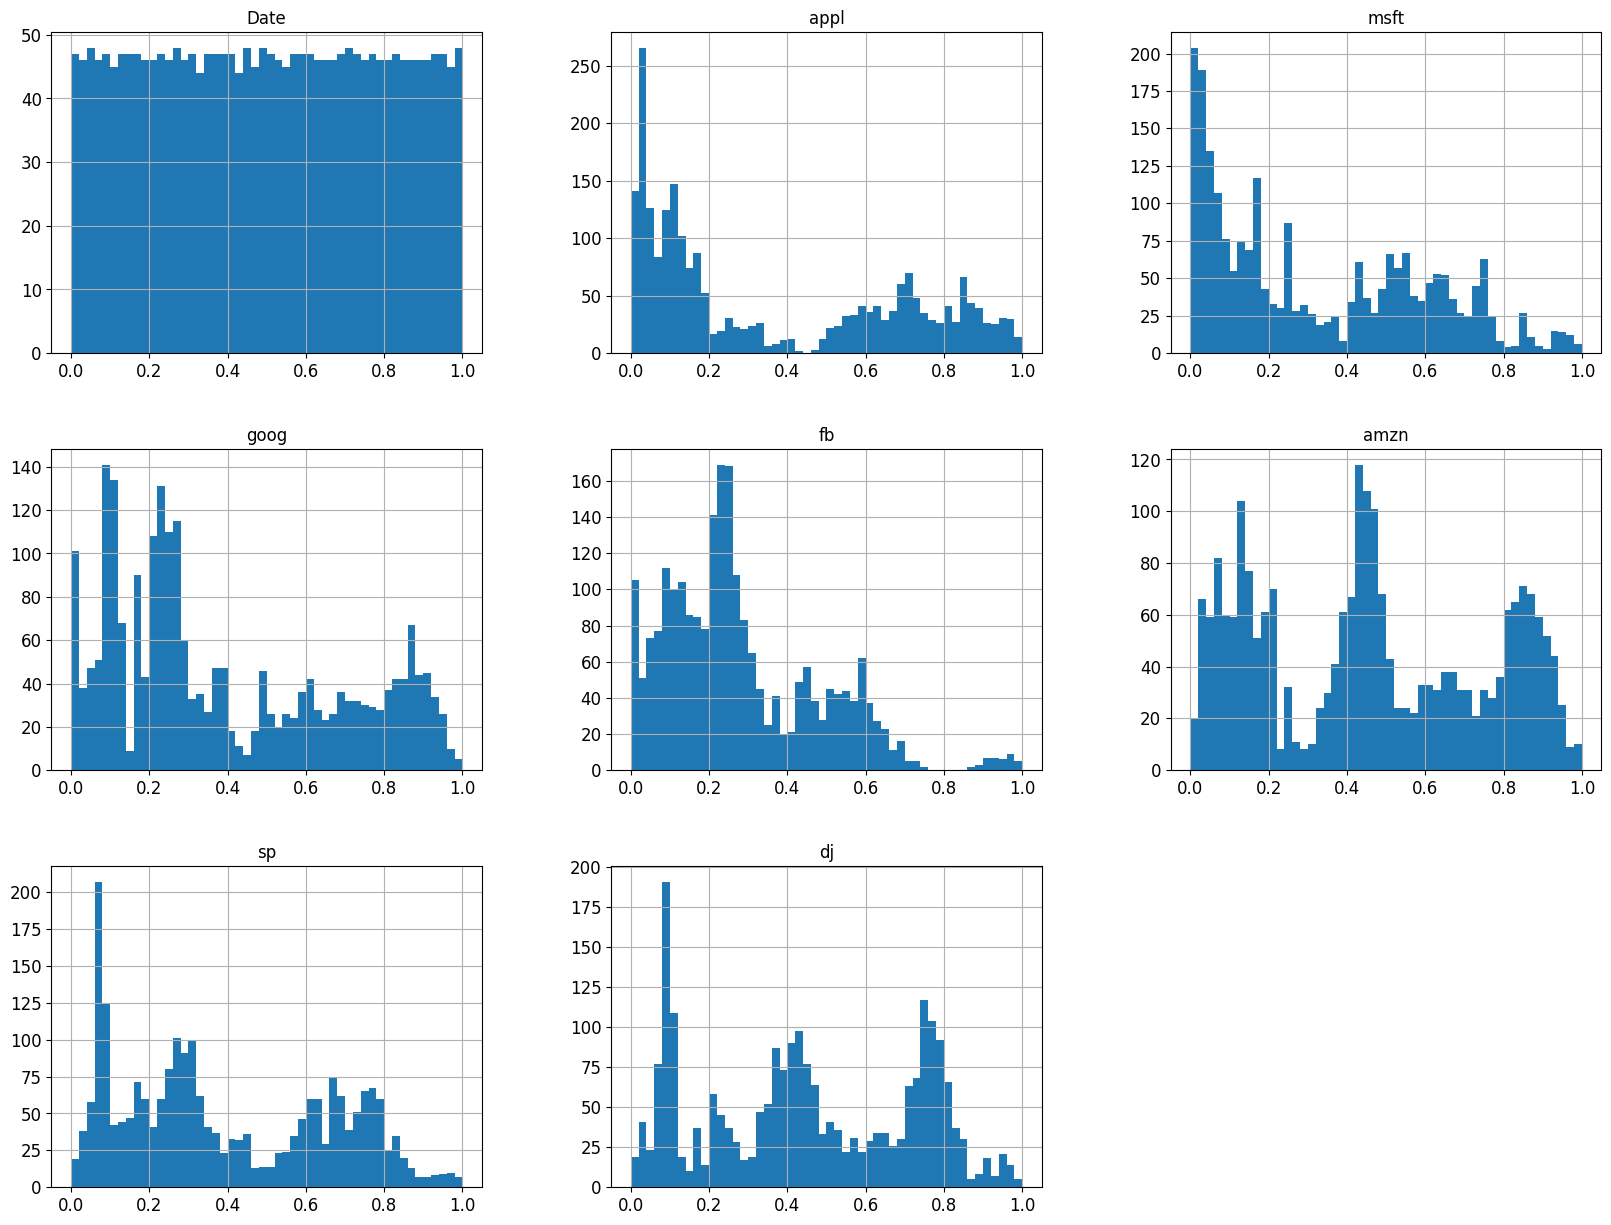

In [ ]:
'''
Histograma
'''
%matplotlib inline
import matplotlib.pyplot as plt
merged_data.hist(bins=50, figsize=(20,15))
plt.show()

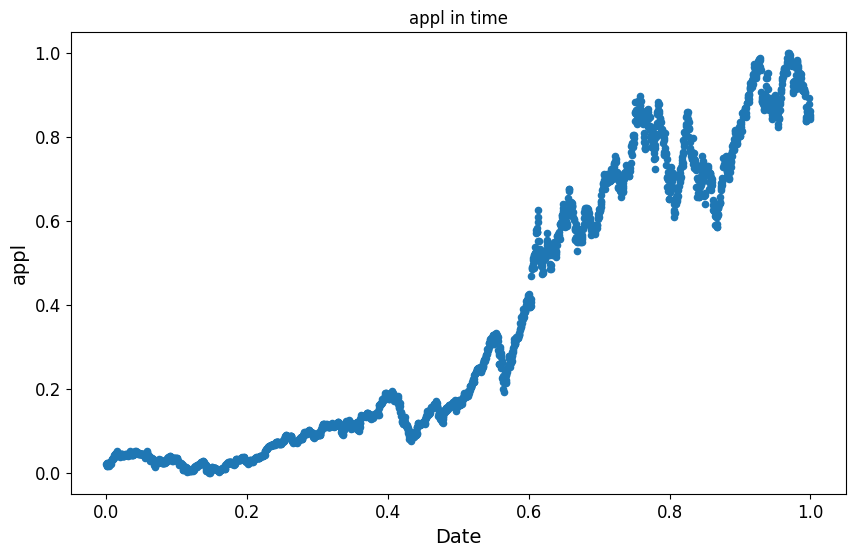

In [ ]:
'''
Apple vs tiempo
'''
merged_data.plot(x='Date', y='appl', kind='scatter', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('appl')
plt.title('appl in time')
plt.show()

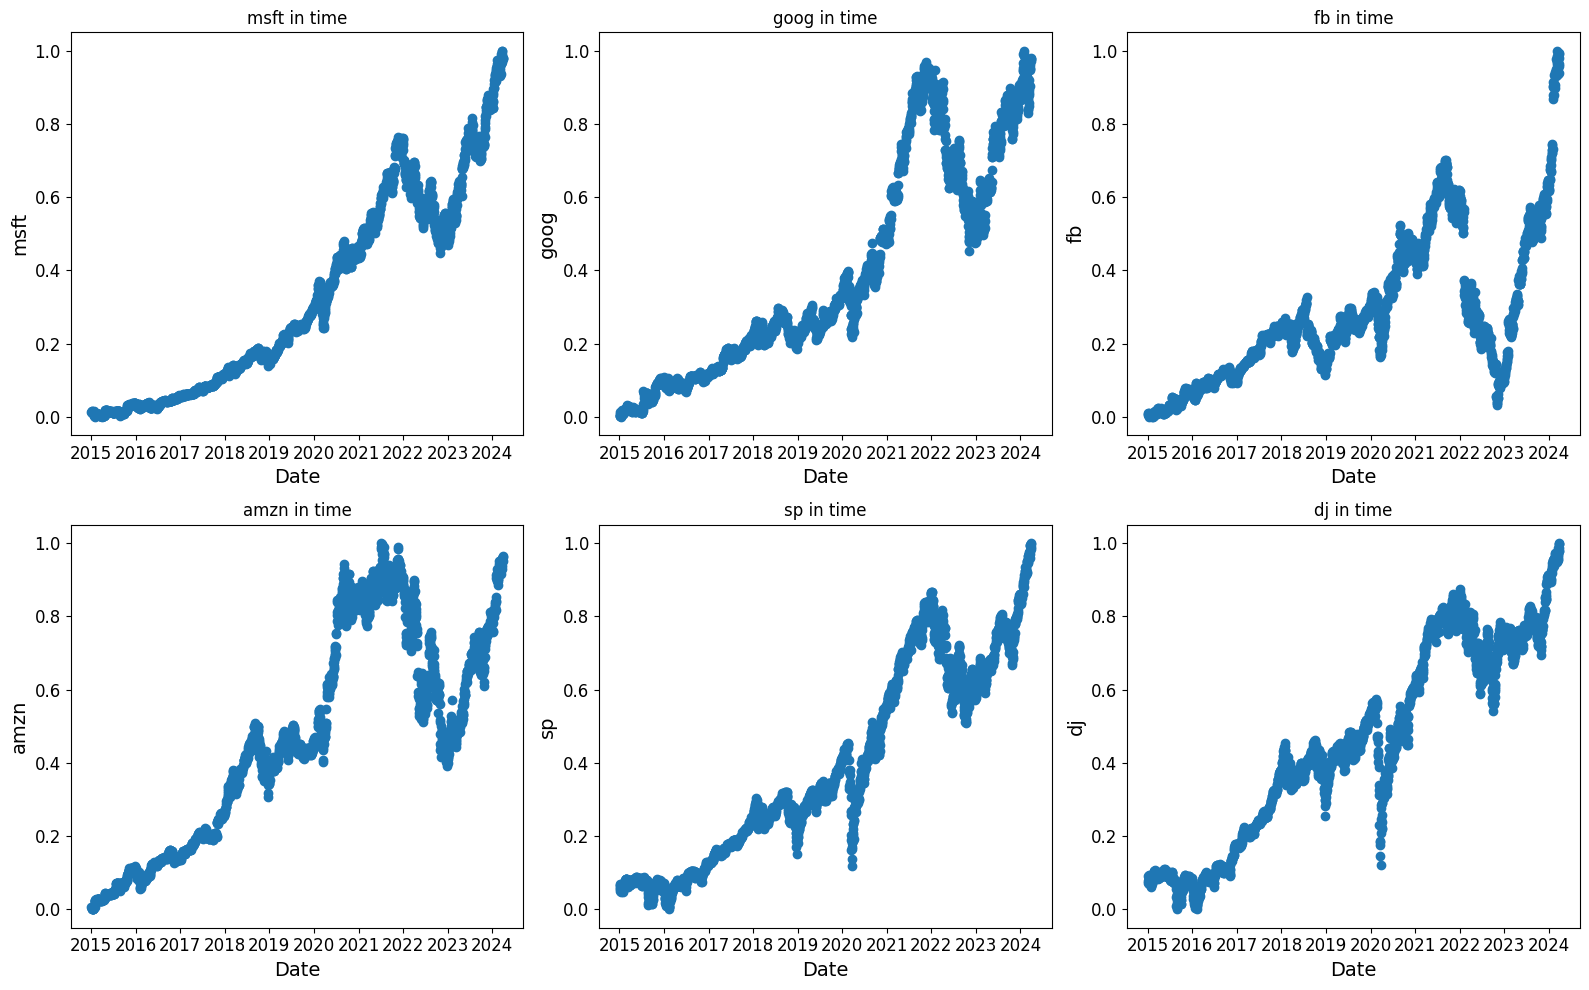

In [ ]:
'''
Otros vs tiempo
'''

fig, axs = plt.subplots(2, 3, figsize=(16, 10))  # 2 filas, 3 columnas

# Gráfico 1: msft
axs[0, 0].scatter(merged_data.index, merged_data['msft'])
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('msft')
axs[0, 0].set_title('msft in time')

# Gráfico 2: goog
axs[0, 1].scatter(merged_data.index, merged_data['goog'])
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('goog')
axs[0, 1].set_title('goog in time')

# Gráfico 3: fb
axs[0, 2].scatter(merged_data.index, merged_data['fb'])
axs[0, 2].set_xlabel('Date')
axs[0, 2].set_ylabel('fb')
axs[0, 2].set_title('fb in time')

# Gráfico 4: amzn
axs[1, 0].scatter(merged_data.index, merged_data['amzn'])
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('amzn')
axs[1, 0].set_title('amzn in time')

# Gráfico 5: sp
axs[1, 1].scatter(merged_data.index, merged_data['sp'])
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('sp')
axs[1, 1].set_title('sp in time')

# Gráfico 6: dj
axs[1, 2].scatter(merged_data.index, merged_data['dj'])
axs[1, 2].set_xlabel('Date')
axs[1, 2].set_ylabel('dj')
axs[1, 2].set_title('dj in time')

plt.tight_layout()  # Ajusta automáticamente la disposición para evitar superposiciones
plt.show()



### 3. Evaluar correlaciones

In [ ]:
'''
Matriz de correlación
'''
matriz_coor = merged_data.corr()
matriz_coor['appl'].sort_values(ascending=False)

appl    1.000000
msft    0.980671
sp      0.968179
goog    0.959910
Date    0.941570
dj      0.930739
amzn    0.842898
fb      0.750869
Name: appl, dtype: float64

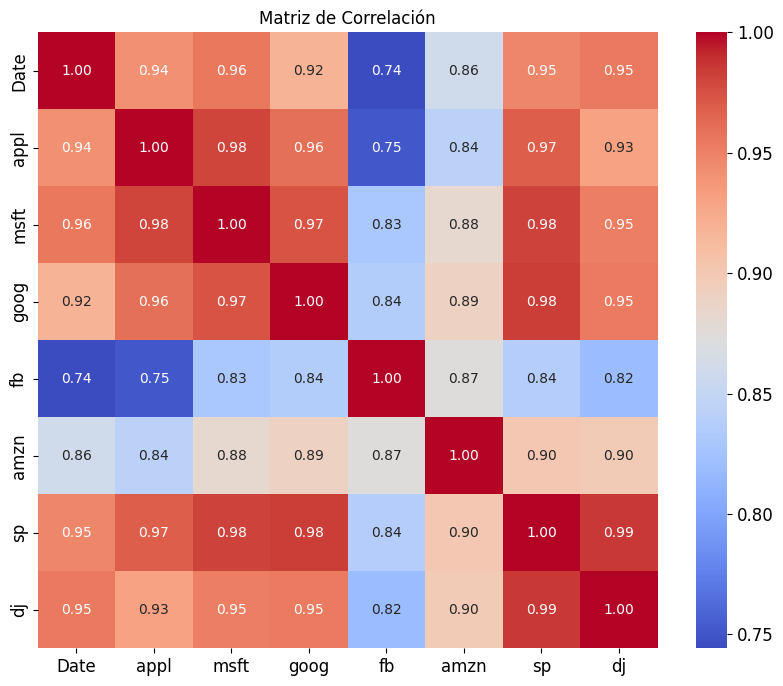

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_coor, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

### 4. Preparar datos para entrenamiento


In [ ]:
x_entrenamiento = merged_data.drop("appl", axis=1) # separa y de X
y_entrenamiento = merged_data["appl"].copy()
x_prueba = merged_data_test.drop("appl",axis=1)
y_prueba = merged_data_test["appl"].copy()
y_entrenamiento.head()

Date
2015-01-02 00:00:00-05:00    0.020686
2015-01-05 00:00:00-05:00    0.016798
2015-01-06 00:00:00-05:00    0.016811
2015-01-07 00:00:00-05:00    0.018691
2015-01-08 00:00:00-05:00    0.023917
Name: appl, dtype: float64

### 5. Probar modelos

In [ ]:
from sklearn.model_selection import train_test_split

x_entrenamiento, x_validacion, y_entrenamiento, y_validacion = train_test_split(x_entrenamiento, y_entrenamiento, test_size=0.3, random_state=42)


In [ ]:
'''
Regresión lineal simple
'''
from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()
reg_lin.fit(x_entrenamiento, y_entrenamiento)

LinearRegression()

In [ ]:
# prueba con algunas instancias pequeñas
pocos_X = x_entrenamiento.iloc[:5]
pocos_y = y_entrenamiento.iloc[:5]

print("Predicciones:", reg_lin.predict(pocos_X))

Predicciones: [0.12684776 0.07088806 0.02422646 0.2468908  0.51432443]


In [ ]:
#Comparar a los valores reales:
print("y real:", list(pocos_y))

y real: [0.13120749188275896, 0.061282506742673375, 0.04467124104805, 0.21573627291912784, 0.5685126335607039]


In [ ]:
'''
Regresión lineal: error
'''
from sklearn.metrics import mean_squared_error

predicciones_X = reg_lin.predict(x_prueba)
lin_mse = mean_squared_error(y_prueba, predicciones_X)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.45881873349913943

In [ ]:
'''
Random Forest
'''
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor(n_estimators=100, random_state=42)
reg_rf.fit(x_entrenamiento, y_entrenamiento)

RandomForestRegressor(random_state=42)

In [ ]:
predicciones_X = reg_rf.predict(x_prueba)
forest_mse = mean_squared_error(y_prueba, predicciones_X)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.35161936147959955

In [ ]:
'''
SVR
'''
from sklearn.svm import SVR
reg_svr = SVR(kernel="rbf")
reg_svr.fit(x_entrenamiento, y_entrenamiento)

SVR()

In [ ]:
predicciones_svr = reg_svr.predict(x_prueba)
svr_mse = mean_squared_error(y_prueba, predicciones_svr)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

0.2114973618195572

In [ ]:
'''
Elegir mejor modelo
'''
print('reg_lin:\t', lin_rmse)
print('random_forest:\t',forest_rmse)
print('svr:\t\t', svr_rmse)

reg_lin:	 0.45881873349913943
random_forest:	 0.35161936147959955
svr:		 0.2114973618195572


In [ ]:
'''
Gráficos
'''
'''
# Graficar los datos originales
plt.scatter(x_prueba['Date'], y_prueba, color='blue', label='Datos de prueba')

# Graficar las predicciones
plt.plot(x_prueba['Date'], predicciones_svr, color='red', label='Predicciones SVR')

plt.xlabel('Variable independiente')
plt.ylabel('Variable dependiente')
plt.title('Regresión SVR')

plt.legend()
plt.show()
'''

"\n# Graficar los datos originales\nplt.scatter(x_prueba['Date'], y_prueba, color='blue', label='Datos de prueba')\n\n# Graficar las predicciones\nplt.plot(x_prueba['Date'], predicciones_svr, color='red', label='Predicciones SVR')\n\nplt.xlabel('Variable independiente')\nplt.ylabel('Variable dependiente')\nplt.title('Regresión SVR')\n\nplt.legend()\nplt.show()\n"

### svr es el mejor modelo en este caso de los modelos de sklearn

### 6. Implementación propia

In [ ]:
'''
Funciones
'''
def calcular_regresion_multivariable(thetas, xs):
  r = np.ones(xs.shape[1])
  #print(xs.shape)

  for i in range(0,xs.shape[1]):
    #print(xs.T[i])
    r[i] = np.dot(thetas,(xs.T)[i])
  return r

def calcular_error(y,y_):
    '''Calcula el error cuadrático medio entre el dato original (y)
       y el dato generado por el modelo (y_)'''
    N = y.shape[0]
    error = np.sum((y-y_)**2)/1*N
    return error

def gradiente_descendente_multivariable(thetas_, alpha, xs, y):
    '''Algoritmo del gradiente descendente para minimizar el error
       cuadrático medio'''
    N = xs.shape[1]  # Cantidad de datos
    # Calcular las predicciones de todos los datos
    y_pred = calcular_regresion_multivariable(thetas_, xs)
    # Calcular el gradiente de forma vectorizada
    #print(y)
    #print(y_pred)
    gradient = - (1/N) * np.dot(xs, (y - y_pred))
    # Actualizar los thetas usando el gradiente
    thetas = thetas_ - alpha * gradient
    return thetas

def train_multivariada(xs,y):
  temp = np.ones((1, xs.shape[1]))
  xs = np.vstack((temp,xs))
  #print(xs)
  np.random.seed(2)
  thetas = np.random.randn(xs.shape[0])
  #print(thetas)

  alpha = 0.00500
  nits = 2000
  error = np.zeros((nits,1))
  for i in range(nits):
      # Actualizar valor de los pesos usando el gradiente descendente
      thetas = gradiente_descendente_multivariable(thetas,alpha,xs,y)
      # Calcular el valor de la predicción
      y_ = calcular_regresion_multivariable(thetas,xs)
      # Actualizar el valor del error
      error[i] = calcular_error(y,y_)
  y_regr = calcular_regresion_multivariable(thetas,xs)
  return y_regr, thetas

def predict(xs, thetas):
  temp = np.ones((1, xs.shape[1]))
  xs = np.vstack((temp,xs))
  y_ = calcular_regresion_multivariable(thetas,xs)
  return y_

In [ ]:
y_, t = train_multivariada(x_entrenamiento.T, y_entrenamiento)

In [ ]:
prediccion = predict(x_prueba.T,t)
error = calcular_error(y_prueba,prediccion)
propio_rmse = np.sqrt(error)
propio_rmse

30.876298496511353

In [ ]:
'''
Comparación
'''
print('reg_lin:\t', lin_rmse)
print('random_forest:\t',forest_rmse)
print('svr:\t\t', svr_rmse)
print('propio:\t\t',propio_rmse)

reg_lin:	 0.45881873349913943
random_forest:	 0.35161936147959955
svr:		 0.2114973618195572
propio:		 30.876298496511353


### 7. Afinar modelo seleccionado








In [ ]:
'''
Validación
'''
from sklearn.model_selection import GridSearchCV

param_grid_svr = {
    'C': [0.1, 1, 10],  # Valores para el parámetro de regularización C
    'kernel': ['linear', 'rbf'],  # Diferentes kernels (lineal o radial)
    'epsilon': [0.1, 0.2, 0.3]  # Valores para el parámetro de tolerancia epsilon
}

svr = SVR()
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5,
                               scoring='neg_mean_squared_error', return_train_score=True)
grid_search_svr.fit(x_entrenamiento, y_entrenamiento)



GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.3],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search_svr.best_params_

{'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}

In [ ]:
grid_search_svr.best_estimator_

SVR(C=10, kernel='linear')

In [ ]:
modelo_final = grid_search_svr.best_estimator_
# recien recupero el conjunto de prueba

predicciones_finales = modelo_final.predict(x_prueba)

final_mse = mean_squared_error(y_prueba, predicciones_finales)
final_rmse = np.sqrt(final_mse)
final_rmse

0.21213428822143665

In [ ]:
print('svr inicial:\t', svr_rmse)
print('svr final:\t', final_rmse)

svr inicial:	 0.2114973618195572
svr final:	 0.21213428822143665


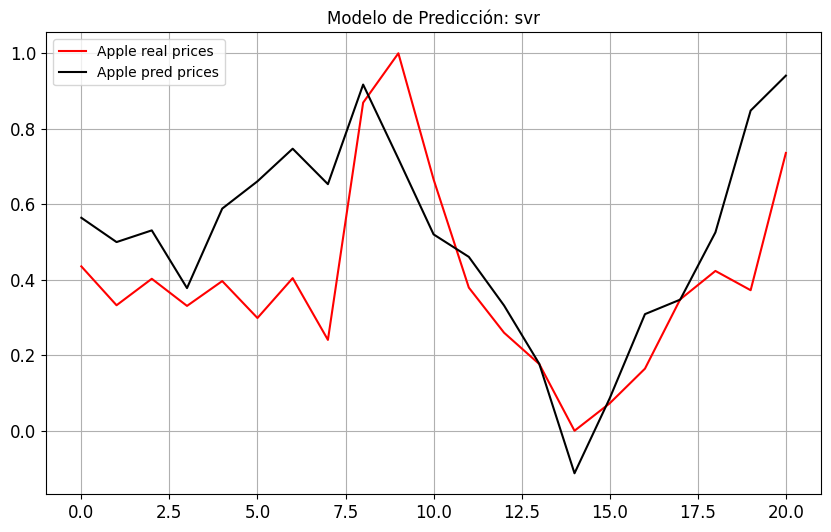

In [ ]:
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(y_prueba.values, color='red', label='Apple real prices')
plt.plot(predicciones_finales, color='black', label='Apple pred prices')
plt.title('Modelo de Predicción: svr')
plt.legend()
plt.show()